<a href="https://colab.research.google.com/github/ChoiJMS2/Colab_Study/blob/main/4%EC%9B%94%20%EA%B3%B5%EB%B6%80/python230420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## 데이터 불러오기

In [ ]:
import pandas as pd 
DATA_PATH = '/kaggle/input/nlp-getting-started/'

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')

train.shape, test.shape

((7613, 5), (3263, 4))

## 대회 주제
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [ ]:
train['text'][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

## 탐색적 자료 분석
- target(=종속변수)부터 확인

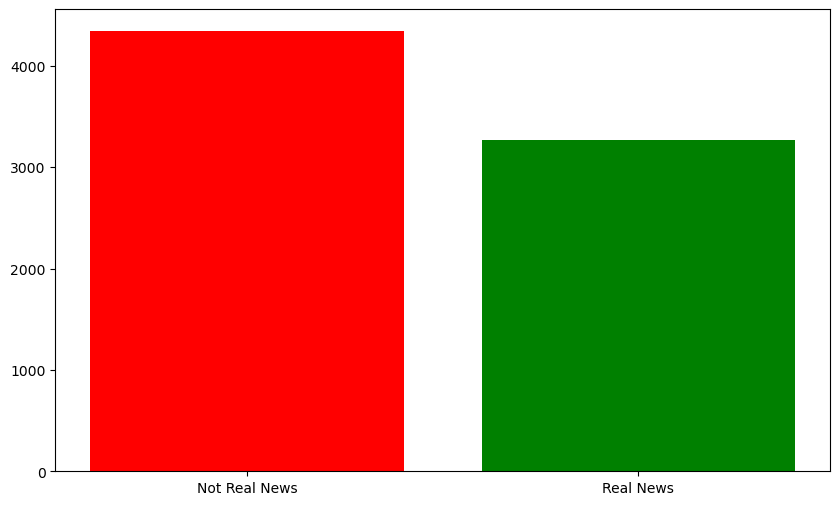

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

news_class = train['target'].value_counts() # 0번 Real News 아님 / 1번 Real News
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Not Real News', 'Real News']
ax.bar(labels, news_class, color = ['red', 'green'])
plt.show()

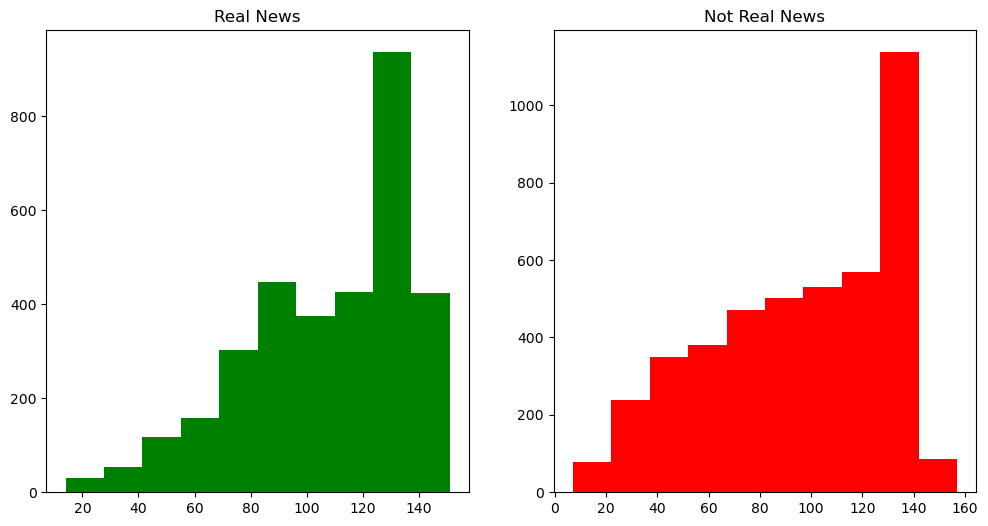

In [ ]:
real_news_len = train[train['target'] == 1]['text'].str.len()
not_real_news_len = train[train['target'] == 0]['text'].str.len()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].hist(real_news_len, color = 'green')
ax[0].set_title('Real News')

ax[1].hist(not_real_news_len, color = 'red')
ax[1].set_title('Not Real News')
plt.show()

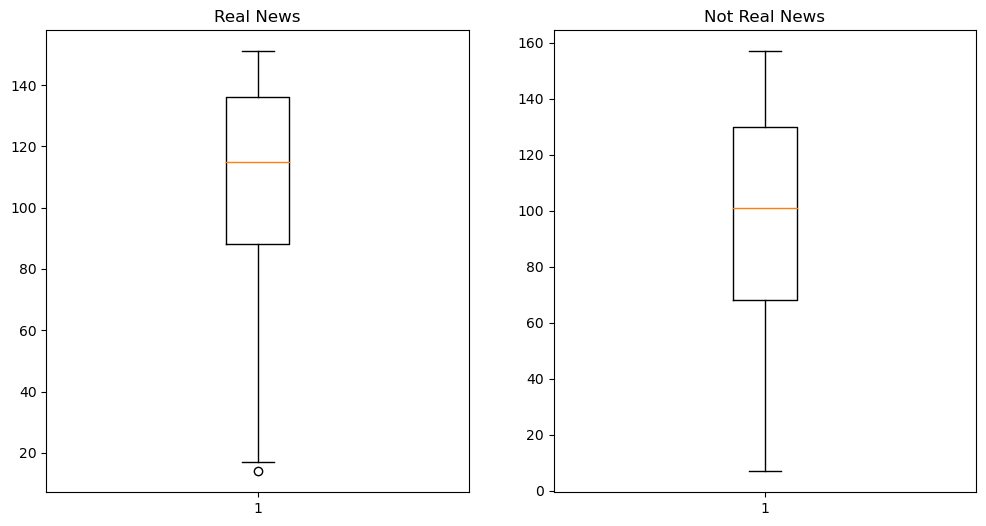

In [ ]:
# boxplot 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(real_news_len)
ax[0].set_title('Real News')

ax[1].boxplot(not_real_news_len)
ax[1].set_title('Not Real News')
plt.show()

## 워드 클라우드
- 단어 빈도분석

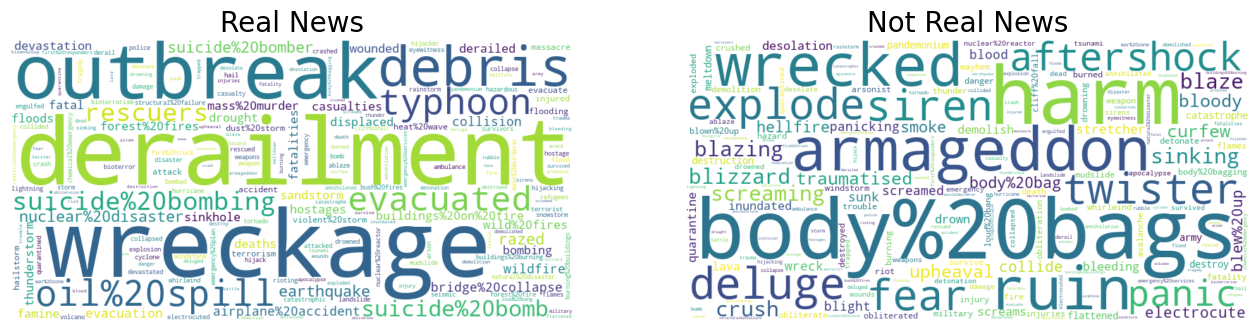

In [ ]:
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Real News", size = 20)
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Not Real News", size = 20)
fig.show()

## 1차 데이터 가공
- 변수 일부 삭제

In [ ]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [ ]:
test_id = test['id']
for data in [train, test]:
    data = data.drop(['id', 'keyword', 'location'], axis = 1, inplace=True)

train.shape, test.shape

((7613, 2), (3263, 1))

In [ ]:
train.head(1)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1


In [ ]:
test.head(1)

,text
0,Just happened a terrible car crash


## Text Cleansing
- HTML 태그 제거
- 특수문제 공백으로 바꾸기
- 대문자, 소문자로 바꾼후, 리스트로 만들기
- 불용어 제거하기

In [ ]:
!pip install emoji --upgrade

In [ ]:
import string
import emoji
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 기초 문법
- def와 lambda 차이점 확인
    + def, 여러군데에서 사용하고자 할 때
    + lambda 1회성

In [ ]:
def totalSum(x, y):
    return x + y

totalSum(1, 2)

3

3

105

In [ ]:
clean_train_text = [] 
for data in [train, test]:
    data['cleaned_text'] = data['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

In [ ]:
train.head(5)

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


## text를 숫자로 변환
- CountVectorizer : 중요하지 않음
- TF-IDF Vectorizer : 매우 매우 중요함

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
corpus = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
corpus = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
vector = TfidfVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, 
                             ngram_range=(1, 3), max_features = 10000)
X = vectorizer.fit_transform(train['cleaned_text']).todense()
y = train['target'].values

In [ ]:
X.shape, y.shape

((7613, 9444), (7613,))

## 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5329, 9444), (2284, 9444), (5329,), (2284,))

## 모델링

In [ ]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LogisticRegression(class_weight='balanced')

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

X_testset = vectorizer.transform(test['cleaned_text']).todense()
print("The Shape of Test Dataset:", X_testset.shape)

y_test_pred = lgs.predict(X_testset)
print("The Predict Value:", y_test_pred)
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
print("The Predict Class:", y_test_pred)

submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
print(submission_file.head())

submission_file.to_csv('submission.csv', index = False)

The Shape of Test Dataset: (3263, 9444)
The Predict Value: [1 0 1 ... 1 1 1]
The Predict Class: [1 0 1 ... 1 1 1]
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
